In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv("1.04. Real-life example.csv")

In [3]:
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Objective: Predict Price Car

Colummns:
Brand: The brand usually chage price car, BMW, Mercedes-Bez > Audi Toyoto
Mileage: Higer mileage lower price
EngineV: Higer Engie higer price
Year: Older the car, usually lower price, but we need know if we have some Vintage car

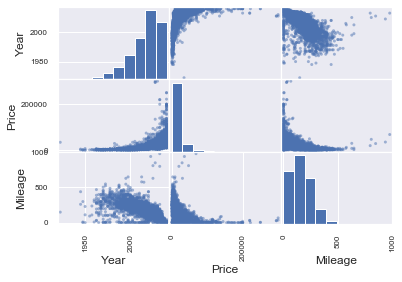

In [4]:
pd.plotting.scatter_matrix(raw_data[['Year','Price',"Mileage"]])
plt.show()

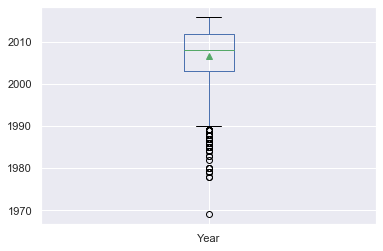

In [5]:
box1 = raw_data.boxplot(column=['Year'],showmeans=True)


We have some cars, outliers from +-1970, 1977 to 1990.

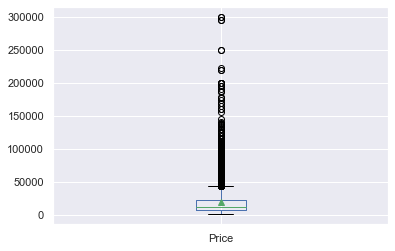

In [6]:
box2 = raw_data.boxplot(column=['Price'],showmeans=True)


Here, we can see a lot of car, outliers, with prices 50000 to 300000.

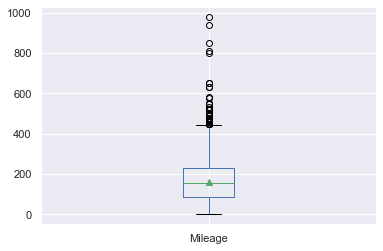

In [7]:
box2 = raw_data.boxplot(column=['Mileage'],showmeans=True)


About mileage, we have somes outlier, cars with 400 to more miles.

# PREPROCESSING

In [8]:
raw_data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


1) About Count we have missing values
2) Unique, we have 312 unique models, this mean we have more than 300 dummies.
We will remove Model car from data

In [9]:
312/4353

0.07167470709855273

In [10]:
data = raw_data#.drop(["Model"],axis=1)
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Dealing with missing values:

In [11]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

The missing values represent only +-3% of data, so we can remove.

In [12]:
data_no_mv = data.dropna(axis=0)
data_no_mv.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000



## Dealing with outliers

In [13]:
q =60000# data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv["Price"]<q]
data_1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3800,3800.000000,3800,3800.000000,3800.000000,3800,3800,3800.000000,3800
unique,7,NaN,6,NaN,NaN,4,2,NaN,292
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,871,NaN,1489,NaN,NaN,1721,3429,NaN,188
mean,NaN,14624.704516,NaN,171.821316,2.712368,NaN,NaN,2005.887368,NaN
std,NaN,11661.435625,NaN,99.029069,5.066968,NaN,NaN,6.554523,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6800.000000,NaN,102.000000,1.800000,NaN,NaN,2002.000000,NaN
50%,NaN,10800.000000,NaN,164.000000,2.000000,NaN,NaN,2007.000000,NaN
75%,NaN,18936.912500,NaN,235.000000,3.000000,NaN,NaN,2011.000000,NaN


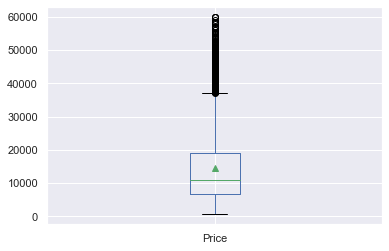

In [14]:
box2 = data_1.boxplot(column=['Price'],showmeans=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


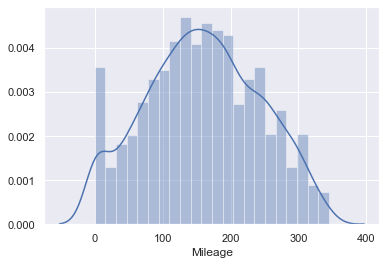

In [15]:
q = data_1['Mileage'].quantile(0.95)
data_2 = data_1[data_no_mv["Mileage"]<q]
sns.distplot(data_2["Mileage"])

In [16]:
data_3 = data_2[data_2['EngineV']<6.5]

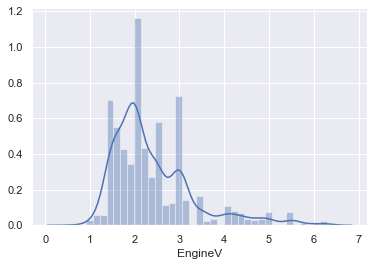

In [17]:
sns.distplot(data_3["EngineV"])

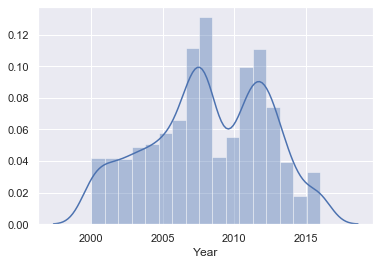

In [18]:
q = data_3['Year'].quantile(0.12)
data_4 = data_3[data_3["Year"]>q]
sns.distplot(data_4["Year"])

Clean all data index and finish cleaning data processor:

In [19]:
data_cleaned = data_4.reset_index(drop=True)

In [20]:
data_cleaned.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3131,3131.000000,3131,3131.000000,3131.000000,3131,3131,3131.000000,3131
unique,7,NaN,6,NaN,NaN,4,2,NaN,244
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,Vito
freq,725,NaN,1108,NaN,NaN,1479,2895,NaN,134
mean,NaN,16670.667218,NaN,148.878952,2.409202,NaN,NaN,2008.140850,NaN
std,NaN,11743.905001,NaN,77.571311,0.947676,NaN,NaN,4.150095,NaN
min,NaN,1200.000000,NaN,0.000000,0.600000,NaN,NaN,2000.000000,NaN
25%,NaN,8500.000000,NaN,94.000000,1.800000,NaN,NaN,2005.000000,NaN
50%,NaN,12700.000000,NaN,149.000000,2.000000,NaN,NaN,2008.000000,NaN
75%,NaN,21650.000000,NaN,200.000000,3.000000,NaN,NaN,2012.000000,NaN


## Checking the OLS assumptions

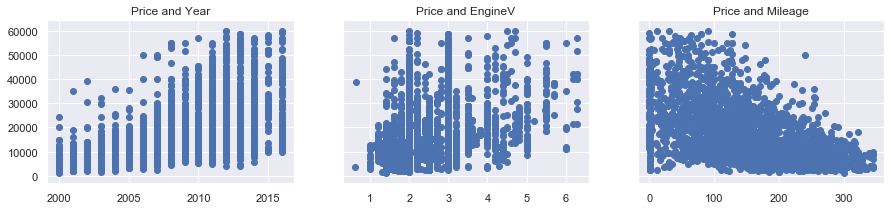

In [21]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned["Year"],data_cleaned["Price"])
ax1.set_title("Price and Year")
ax2.scatter(data_cleaned["EngineV"],data_cleaned["Price"])
ax2.set_title("Price and EngineV")
ax3.scatter(data_cleaned["Mileage"],data_cleaned["Price"])
ax3.set_title("Price and Mileage")

plt.show()

We will Log transform Price, to remove exponetinal tendency from year, enginev and mileage

In [22]:
log_price = np.log(data_cleaned["Price"])
data_cleaned["log_price"] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
1,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
2,Audi,14200.0,vagon,200,2.7,Diesel,yes,2006,A6,9.560997
3,Renault,10799.0,vagon,193,1.5,Diesel,yes,2012,Megane,9.287209
4,Renault,11950.0,vagon,177,1.5,Diesel,yes,2011,Megane,9.388487
...,...,...,...,...,...,...,...,...,...,...
3126,Renault,2100.0,vagon,237,1.9,Diesel,no,2001,Laguna,7.649693
3127,Renault,6800.0,sedan,152,1.6,Petrol,yes,2007,Megane,8.824678
3128,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3129,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556


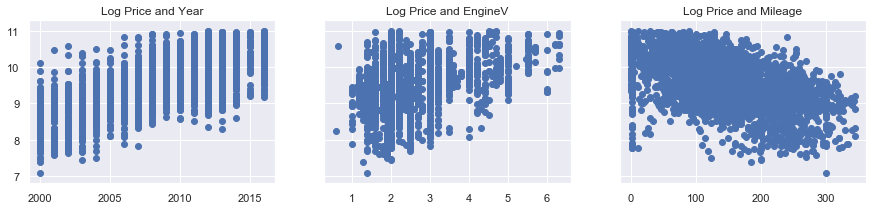

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned["Year"],data_cleaned["log_price"])
ax1.set_title("Log Price and Year")
ax2.scatter(data_cleaned["EngineV"],data_cleaned["log_price"])
ax2.set_title("Log Price and EngineV")
ax3.scatter(data_cleaned["Mileage"],data_cleaned["log_price"])
ax3.set_title("Log Price and Mileage")

plt.show()

## Multicollinearty

Nao ficou claro o motivo de remover ano do data.

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[["Mileage","Year","EngineV"]]
vif = pd.DataFrame()
vif ["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [25]:
vif

,VIF,features
0,4.705323,Mileage
1,10.231139,Year
2,7.526111,EngineV


In [26]:
data_no_multicollinearity = data_cleaned.drop(["Year"],axis=1)

## Create dummy var

In [27]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [28]:
data_with_dummies.head()

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Virage,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z4
0,23000.0,240,4.2,10.043249,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18300.0,120,2.0,9.814656,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,14200.0,200,2.7,9.560997,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10799.0,193,1.5,9.287209,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11950.0,177,1.5,9.388487,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_116', 'Model_118', 'Model_120', 'Model_210', 'Model_220',
       'Model_316', 'Model_318', 'Model_320', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_525', 'Model_528', 'Model_530',
       'Model_535', 'Model_545', 'Model_550', 'Model_630', 'Model_640',
       'Model_645', 'Model_650', 'Model_730', 'Model_735', 'Model_740',
       'Model_745', 'Model_750', 'Model_760', 'Model_A 140',
       'Model_A 150', 'Model_A 170', 'Model_A 180', 'Model_A1',
       'Model_A3', 'Model_A4', 'Model_A

In [30]:
cols = data_with_dummies.columns.values

In [31]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,...,Model_Virage,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z4
0,23000.0,240,4.2,10.043249,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18300.0,120,2.0,9.814656,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,14200.0,200,2.7,9.560997,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10799.0,193,1.5,9.287209,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11950.0,177,1.5,9.388487,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Linear regression model

declare the inputs and the targets

In [56]:
targets = data_preprocessed["log_price"]
inputs = data_preprocessed.drop(['log_price'], axis=1)

scale the data

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [83]:
inputs_scaled = scaler.transform(inputs)

## Split data in Train and Test

In [84]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=45)
x_test


,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Virage,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z4
1745,8800.0,287,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
234,7500.0,240,1.8,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
829,6800.0,219,1.6,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
447,16950.0,135,3.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1349,6400.0,181,2.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,8200.0,180,1.6,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
553,19000.0,139,2.4,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
572,8800.0,205,2.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2479,22800.0,161,2.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


## Create the regression

In [85]:
reg = LinearRegression()
reg.fit(x_train, y_train) #remember it's log linear regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
y_hat = reg.predict(x_train)

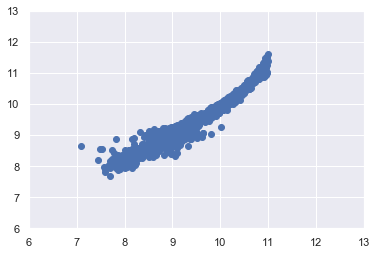

In [87]:
plt.scatter(y_train, y_hat)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Redidual PDF')

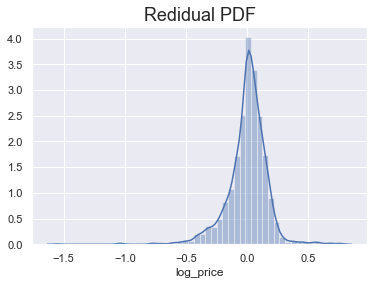

In [88]:
sns.distplot(y_train - y_hat)
plt.title("Redidual PDF", size=18)

In [89]:
reg.score(x_train, y_train)

0.9440089641794607

## Finding the weights and bias

In [90]:
reg.intercept_

22147916.812431756

In [91]:
reg.coef_

array([ 4.17157672e-05, -7.05414226e-04,  3.01074147e-02, -2.21479092e+07,
       -2.21479092e+07, -1.07890391e+07, -1.96381588e+07, -2.77150266e+07,
       -1.45640234e+07, -2.54382240e-03, -1.01865749e-02,  2.44242251e-02,
        1.51950466e-02,  1.05094640e-02, -7.92045705e-03,  4.89946548e-03,
       -1.10859983e-03,  6.37545602e-01,  8.55215257e-01,  9.03289087e-01,
       -2.57398384e-01, -1.93155266e+07,  7.71305296e-01,  4.58218625e-01,
        4.96859506e-01,  6.06697345e-01,  8.31898698e-01,  7.05027269e-01,
        6.32047453e-01,  8.57085296e-01,  4.13169147e-01,  7.41578704e-01,
        5.56711796e+06,  5.69743612e-01,  6.60270996e-01,  7.30392419e-01,
        8.09892303e-01,  6.19530373e-01,  7.57184696e-01,  6.68934466e-01,
        7.10312065e-01,  7.79773923e-01,  3.70044416e-01,  8.58125729e-01,
        4.98921998e-01,  8.01005197e-01,  8.29123233e-01,  7.50627066e-01,
        7.20675162e-01,  7.70239910e-01,  5.47616092e-01,  6.15486460e-01,
        7.95064715e-01, -

In [92]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=["Features"])
reg_summary["Weigts"] = reg.coef_
reg_summary

,Features,Weigts
0,Price,4.171577e-05
1,Mileage,-7.054142e-04
2,EngineV,3.010741e-02
3,Brand_BMW,-2.214791e+07
4,Brand_Mercedes-Benz,-2.214791e+07
...,...,...
256,Model_X5 M,3.262450e-01
257,Model_X6,7.079621e-01
258,Model_X6 M,5.335932e-01
259,Model_Yaris,5.567118e+06


So, we drop Audi Brand, and It's our benchmark. When we see  "Brand_BMW	0.014250" means BMW is 0.0142 better than Audi, in other hand renout is 0.1799 lower than Audi.

# Testing:

In [93]:
y_hat_test = reg.predict(x_test)

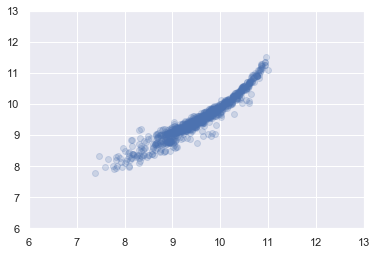

In [94]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

For higer price, our model is concetrated, but for lowe price, we have biger variation and bad model. In te ceter was a good prediction

In [95]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predicion'])
df_pf.head()

,Predicion
0,9540.217804
1,6696.951986
2,7830.181257
3,16962.593388
4,8037.258761


In [96]:
df_pf["Target"] = np.exp(y_test)
df_pf = df_pf[df_pf["Predicion"] < 7000000]
df_pf.describe()

,Predicion,Target
count,931.000000,279.000000
mean,16682.957048,17138.222115
std,13654.040479,11808.721883
min,0.000000,1750.000000
25%,9022.043459,8954.765000
50%,12205.409821,13100.000000
75%,19253.361631,20250.000000
max,99051.357954,57000.000000


In [97]:
y_test =y_test.reset_index(drop=True)
y_test.head()

0    9.082507
1    8.922658
2    8.824678
3    9.738023
4    8.764053
Name: log_price, dtype: float64

In [98]:
df_pf["Target"] = np.exp(y_test)
df_pf

,Predicion,Target
0,9540.217804,8800.0
1,6696.951986,7500.0
2,7830.181257,6800.0
3,16962.593388,16950.0
4,8037.258761,6400.0
...,...,...
935,6412.636179,8200.0
936,16992.427604,19000.0
937,10685.471242,8800.0
938,22223.693825,22800.0


In [99]:
df_pf['Redisual'] = df_pf["Target"] - df_pf["Predicion"]

In [100]:
df_pf['difference%'] = np.absolute(df_pf['Redisual'] / df_pf["Target"]*100)

In [101]:
df_pf

,Predicion,Target,Redisual,difference%
0,9540.217804,8800.0,-740.217804,8.411566
1,6696.951986,7500.0,803.048014,10.707307
2,7830.181257,6800.0,-1030.181257,15.149724
3,16962.593388,16950.0,-12.593388,0.074297
4,8037.258761,6400.0,-1637.258761,25.582168
...,...,...,...,...
935,6412.636179,8200.0,1787.363821,21.797120
936,16992.427604,19000.0,2007.572396,10.566171
937,10685.471242,8800.0,-1885.471242,21.425810
938,22223.693825,22800.0,576.306175,2.527659


In [102]:
df_pf.describe()

,Predicion,Target,Redisual,difference%
count,931.000000,931.000000,931.000000,931.000000
mean,16682.957048,16772.295467,89.338419,14.140018
std,13654.040479,11491.898691,4433.089819,17.216753
min,0.000000,1600.000000,-42051.357954,0.066072
25%,9022.043459,8700.000000,-802.116285,3.877179
50%,12205.409821,13100.000000,197.359020,9.384745
75%,19253.361631,21675.000000,1672.515128,17.233344
max,99051.357954,59999.000000,22000.000000,142.484187


# RESULT:

86% accuracy of test results.

We just remove a lot of outliers 